# Titanic Dataset: Automatic EDA, different Data Preprocessing & Modeling Techniques compared with Pipelines + RandomSearchCV and much more!

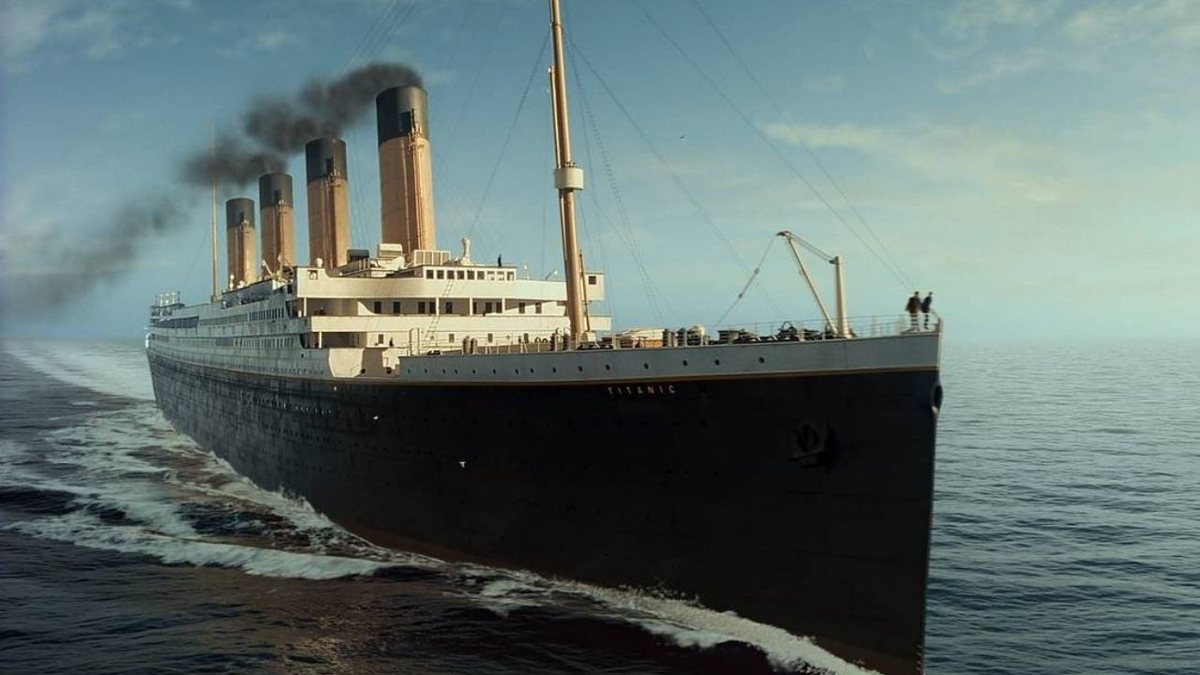

The main goal of this notebook is to try to present a complete approach to modeling problems, that goes from Exploratory Data Analysis to applying Supervised and Unsupervised learning techniques to our data. This notebook's content is mainly directed to data scientists, data science students or people interested in how these techniques can be applied into data.

Thanks to Andreas C. Muller, Sarah Guido & other co-authors, for writting the book **"Introduction to Machine Learning with Python"**. A great source of knowledge for Data Scientists of all levels.

Notebook written by **Pedro de Matos Gonçalves**

---

# *Section 1 - Data Exploration*

The first step is to import needed libraries.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import string # library used to deal with text data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 100) # Setting pandas dataframe display width to N
from scipy import stats # statistical library
from statsmodels.stats.weightstats import ztest # statistical library for hypothesis testing
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px # interactive plotting library
from itertools import cycle # used for cycling colors at plotly graphs
import matplotlib.pyplot as plt # plotting library
import pandas_profiling # library for automatic EDA
%pip install autoviz # installing and importing autoviz, another library for automatic data visualization
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display # display from IPython.display
from itertools import cycle # function used for cycling over values
%pip install ppscore # installing ppscore, library used to check non-linear relationships between our variables
import ppscore as pps # importing ppscore


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print("")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

To begin our analysis, lets take our first look at the dataset. To save some precious time on our Exploratory Data Analysis process, we are going to use 2 libraries: **"pandas_profiling"** and **"autoviz"**.

In [ ]:
# Importing the data and displaying some rows
df = pd.read_csv("/kaggle/input/titanic/train.csv")

display(df.head(10))

In [ ]:
# The pandas profiling library is really useful on helping us understand the data we're working on.
# It saves us some precious time on the EDA process.
report = pandas_profiling.ProfileReport(df)

In [ ]:
# Let's now visualize the report generated by pandas_profiling.
display(report)

# Also, there is an option to generate an .HTML file containing all the information generated by the report.
# report.to_file(output_file='report.html')

In [ ]:
# Another great library for automatic EDA is AutoViz.
# With this library, several plots are generated with only 1 line of code.
# When combined with pandas_profiling, we obtain lots of information in a
# matter of seconds, using less than 5 lines of code.
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz("/kaggle/input/titanic/train.csv")

Using the power of both automatic EDA libraries listed above, we can observe each variable's behaviour individually, with plots that goes from Histograms to Boxplots, Correlation Matrix and much more. It speeds up time and minimizes the effort spent on the initial process of our work.

We can gather some really useful information from both reports. Let's now point some of them out:

* Our classes are not that much disbalanced. We have ~38% of the passengers into class "1" (survived) and ~62% of the passengers into class "0" (didn't survive).


* The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, ~24% of them are on class 2 and ~21% on class 1.


* Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male.


* Almost 20% of the values in the "Age" column are missing. We can fill out these nulls with various techniques, such as filling them with the distribution's mean. The ages distribution is a little bit skewed, with it's mean being around 30 years old, and it's standard deviation being close to 15. The oldest passenger we have in this dataset is 80 years old.


* According to the "SibSP" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship. That is also applied when we check out the "Parch" column.


* The distribution of Fares is much more skewed. It's mean value is around 32, with it's standard deviation being close to 50. It's minimum value is 0, and it's maximum value is 512.3292. That means that we're going to have to deal with this column carefully if we plan to use models such as SVMs.


* When ckecking the "Embarked" column, it shows us that 72.3% of the passengers embarked at Southampton port, 18.9% of the passengers at Cherbourg port and 8.6% of the passengers at Queenstown port.


* "Fare" values are higher for passengers with "Pclass" = 1, lower for passengers with "Pclass" = 2 and even lower for passengers with "Pclass" = 3. Logically, it looks like the classification of "Pclass" is defined by the value of the passenger's fare.



## More Exploration

Before we go to the modeling part, let's take a look at a few more plots that gives us a different perspective from the ones generated above. That may give us further insights and help us understand the differences between the passengers that survived the catastrophe and the people that didn't. For these visualizations, we are going to use Plotly, a library that gives us beautiful plots and allows us to interact with them.

First, let's take a look at the differences between the ages of both groups, using a Violin plot.

In [ ]:
# Creating different datasets for survivors and non-survivors
df_survivors = df[df['Survived'] == 1]
df_nonsurvivors = df[df['Survived'] == 0]

In [ ]:
# Filling in the data inside the Violin Objects
violin_survivors = go.Violin(
    y=df_survivors['Age'],
    x=df_survivors['Survived'],
    name='Survivors',
    marker_color='forestgreen',
    box_visible=True)

violin_nonsurvivors = go.Violin(
    y=df_nonsurvivors['Age'],
    x=df_nonsurvivors['Survived'],
    name='Non-Survivors',
    marker_color='darkred',
    box_visible=True)

data = [violin_nonsurvivors, violin_survivors]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Age" of survivors vs Ages of non-survivors',
  xaxis=dict(
        title='Survived or not'
    ),
    yaxis=dict(
        title='Age'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# First distribution for the hypothesis test: Ages of survivors
dist_a = df_survivors['Age'].dropna()

# Second distribution for the hypothesis test: Ages of non-survivors
dist_b = df_nonsurvivors['Age'].dropna()

In [ ]:
# Z-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat, p_value = ztest(dist_a, dist_b)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat))
print("P value = " + str(p_value)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat_2, p_value_2 = stats.ttest_ind(dist_a, dist_b)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_2))
print("P value = " + str(p_value_2)) # P-value is less than 0.05

As we can see both from the plot and hypothesis tests showed above, there is actually a statistically significant difference between the means of both distributions (ages of survivors and non-survivors). Let's do some more exploring to see what further information we can gather from this data.

In [ ]:
# Taking the count of each Sex value inside the Survivors
df_survivors_sex = df_survivors['Sex'].value_counts()
df_survivors_sex = pd.DataFrame({'Sex':df_survivors_sex.index, 'count':df_survivors_sex.values})

# Taking the count of each Sex value inside the Survivors
df_nonsurvivors_sex = df_nonsurvivors['Sex'].value_counts()
df_nonsurvivors_sex = pd.DataFrame({'Sex':df_nonsurvivors_sex.index, 'count':df_nonsurvivors_sex.values})


# Creating the plotting objects
pie_survivors_sex = go.Pie(  
   labels = df_survivors_sex['Sex'],
   values = df_survivors_sex['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_sex = go.Pie(  
   labels = df_nonsurvivors_sex['Sex'],
   values = df_nonsurvivors_sex['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['cornflowerblue', 'violet'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_sex, pie_nonsurvivors_sex]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Sex" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
# Taking the count of each Pclass value inside the Survivors
df_survivors_pclass = df_survivors['Pclass'].value_counts()
df_survivors_pclass = pd.DataFrame({'Pclass':df_survivors_pclass.index, 'count':df_survivors_pclass.values})

# Taking the count of each Pclass value inside the Survivors
df_nonsurvivors_pclass = df_nonsurvivors['Pclass'].value_counts()
df_nonsurvivors_pclass = pd.DataFrame({'Pclass':df_nonsurvivors_pclass.index, 'count':df_nonsurvivors_pclass.values})


# Creating the plotting objects
pie_survivors_pclass = go.Pie(  
   labels = df_survivors_pclass['Pclass'],
   values = df_survivors_pclass['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['#636EFA', '#EF553B', '#00CC96'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_pclass = go.Pie(  
   labels = df_nonsurvivors_pclass['Pclass'],
   values = df_nonsurvivors_pclass['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['#EF553B', '#00CC96', '#636EFA'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_pclass, pie_nonsurvivors_pclass]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Pclass" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

From the pie chart showed above, we can notice a peculiar behavior: when looking at passengers that didn't survive, ~68% of them were at "Pclass" 3. When looking at passengers that survived, only ~35% of them were at "Pclass" 3.

At the same point of view, when looking at passengers that survived, ~40% of them were at "Pclass" 1. At the non-survivors, only 14.6% of them were at "Pclass" 1.

It seems that there is some kind of relation between "P-class" and the fact of a passenger surviving the accident or not. Let's get into more detail.

In [ ]:
# Checking out the differences between Fare distribution for survivors and non-survivors
fare_survivors_box = go.Box(  
   x=df_survivors['Fare'],
   name='Survivors',
   marker=dict(color='navy')
)

fare_nonsurvivors_box = go.Box(  
   x=df_nonsurvivors['Fare'],
   name='Non-Survivors',
   marker=dict(color='steelblue')
)
  
data = [fare_nonsurvivors_box, fare_survivors_box]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Fare" value of survivors vs "Fare" value of non-survivors',
    barmode='stack',
    xaxis=dict(
        title='Fare distribution'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# Third distribution for the hypothesis test - Fares of survivors
dist_c = df_survivors['Fare'].dropna()

# Fourth distribution for the hypothesis test - Fares of non-survivors
dist_d = df_nonsurvivors['Fare'].dropna()

In [ ]:
# Z-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_3, p_value_3 = ztest(dist_c, dist_d)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat_3))
print("P value = " + str(p_value_3)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_4, p_value_4 = stats.ttest_ind(dist_c, dist_d)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_4))
print("P value = " + str(p_value_4)) # P-value is less than 0.05

Checking out the plots and hypothesis tests over fare distributions, comparing Survivors and non-Survivors, we can again observe that there is a statistically significant difference between the means of both groups. 

When checking out the boxplots, we can see that fare values of survivors are generally higher, when compared to fare values of non-survivors. This information is probably related to the "Pclass" percentages we have seen before on the pie plots.

## PPS (Predictive Power Score)

You may have heard about correlation matrices. Basically, correlation matrices are able to identify linear relationships between variables. Because relationships in our data may sometimes be non-linear (most of the times, actually), we can use a PPS (Predictive Power Score) matrix, to figure out **non-linear relations** between columns.

If you want to understand why PPS is important, I recommend you to read this medium article: https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

Also, take a look at the Python PPS implementation used in this notebook: https://github.com/8080labs/ppscore

In [ ]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

Looking at this PPS matrix, we can see that the best univariate predictor of the **Survived** variable is the column **Ticket**, with 0.19 pps, followed by **Sex**, with 0.13 pps. That makes sense because women were prioritized during the rescue, and ticket is closely related to **Pclass**. The best univariate predictor of the **Parch** variable is the column **Cabin**, with 0.37 pps, and so on.

---

# *Section 2 - Supervised Learning: Classification*

Now that we have some nice context about the data we are working with, let's dive into the modeling part.

First of all, we import the libraries we're going to use.

In [ ]:
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from category_encoders import TargetEncoder, LeaveOneOutEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

## Feature Engineering 

To help us get a better performance, we can create new features based on the original features of our dataset.

Some new features created here were based on the great ideas shown on this brilliant notebook from **Gunes Evitan**: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#2.-Feature-Engineering

In [ ]:
# Creating a categorical variable for Ages
df['AgeCat'] = ''
df['AgeCat'].loc[(df['Age'] < 18)] = 'young'
df['AgeCat'].loc[(df['Age'] >= 18) & (df['Age'] < 56)] = 'mature'
df['AgeCat'].loc[(df['Age'] >= 56)] = 'senior'

# Creating a categorical variable for Family Sizes
df['FamilySize'] = ''
df['FamilySize'].loc[(df['SibSp'] <= 2)] = 'small'
df['FamilySize'].loc[(df['SibSp'] > 2) & (df['SibSp'] <= 5 )] = 'medium'
df['FamilySize'].loc[(df['SibSp'] > 5)] = 'large'

# Creating a categorical variable to tell if the passenger is alone
df['IsAlone'] = ''
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) > 0)] = 'no'
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) == 0)] = 'yes'

# Creating a categorical variable to tell if the passenger is a Young/Mature/Senior male or a Young/Mature/Senior female
df['SexCat'] = ''
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] <= 21)] = 'youngmale'
df['SexCat'].loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50)] = 'maturemale'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 50)] = 'seniormale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] <= 21)] = 'youngfemale'
df['SexCat'].loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50)] = 'maturefemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 50)] = 'seniorfemale'

# Creating a categorical variable for the passenger's title
# Title is created by extracting the prefix before "Name" feature
# This title needs to be a feature because all female titles are grouped with each other
# Also, creating a column to tell if the passenger is married or not
# "Is_Married" is a binary feature based on the Mrs title. Mrs title has the highest survival rate among other female titles
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

# Creating "Ticket Frequency" Feature
# There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

df.head(10)

After creating new features, we can drop useless columns that we won't use in the training process.

In [ ]:
def get_feature_names(df):
    # Splitting the target
    target = df['Survived']

    # Dropping unused columns from the feature set
    df.drop(['PassengerId', 'Survived', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

    # Splitting categorical and numerical column dataframes
    categorical_df = df.select_dtypes(include=['object'])
    numeric_df = df.select_dtypes(exclude=['object'])

    # And then, storing the names of categorical and numerical columns.
    categorical_columns = list(categorical_df.columns)
    numeric_columns = list(numeric_df.columns)
    
    print("Categorical columns:\n", categorical_columns)
    print("\nNumeric columns:\n", numeric_columns)

    return target, categorical_columns, numeric_columns

target, categorical_columns, numeric_columns = get_feature_names(df)


## Model training & Evaluation functions

After all the preprocessing, we are now ready to build and evaluate different Machine Learning models.

First, let's create a function responsible for evaluating our classifiers on a test set we will create later.

In [ ]:
# Function responsible for checking our model's performance on the test data
def testSetResultsClassifier(best_model_pipeline, x_test, y_test):
    results = []
    
    predictions = best_model_pipeline.best_estimator_.predict(x_test)

    # Metrics applied on Probabilistic models and GLMs (predicted_proba for 
    # probabilistic ones, decision_function for GLMs)
    predicted_probas_class1 = best_model_pipeline.best_estimator_.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predicted_probas_class1)
    avg_precision = average_precision_score(y_test, predicted_probas_class1)
    
    # Universal metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    results.append(accuracy)
    results.append(precision)
    results.append(recall)
    results.append(f1)
    results.append(avg_precision)
    results.append(roc_auc)
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("Accuracy:", round(results[0], 3))
    print("Precision:", round(results[1], 3))
    print("Recall:", round(results[2], 3))
    print("F1-Score:", round(results[3], 3))
    print("Average Precision (Precision/Recall AUC):", round(results[4], 3))
    print("ROC_AUC:", round(results[5], 3))
    
    return results

## Pipeline Construction

Well, you might be wondering now: What is a Pipeline?

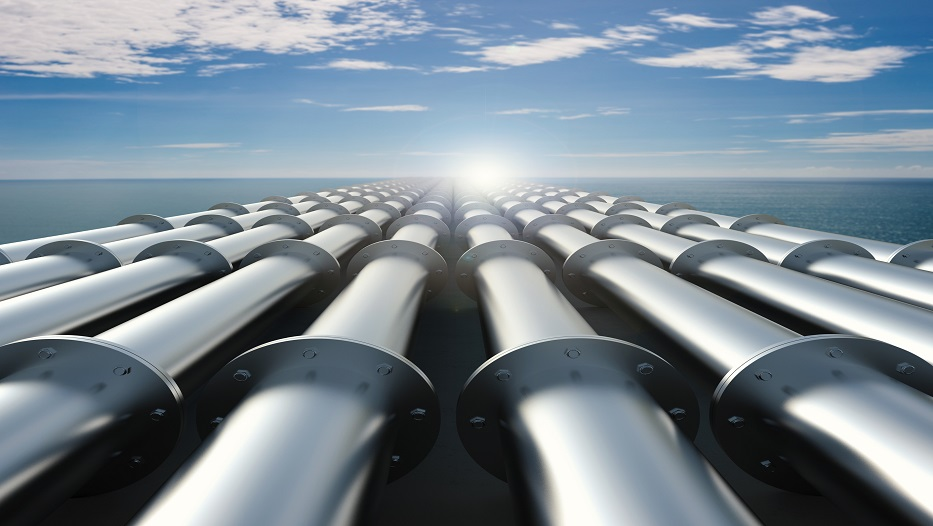

We can understand a Pipelines as a sequence of actions applied in data. Just like the image above, you can see that a full pipeline is made of several different small pipes. Take this to Data Science: imagine that each small pipe is a step in a modeling process. For example:

#### -> Step 1: fill null values from numerical columns. 

#### -> Step 2: normalize numerical features, so they will be in the same scale. 

#### -> Step 3: fill null values from categorical features. 

#### -> Step 4: OneHotEncode categorical features.

#### -> Step 5: fit a Machine Learning model and evaluate it.

Instead of doing each one of these steps separately, we can create a Pipeline object that unites all of them, and then fit this object into our training data.

And why should we do that?

Well, there are a lot of advantages we get on using pipelines. Below are the ones I find most relevant for this discussion:


### 1 - Production code gets much easier to implement
When deploying a Machine Learning model into production, the main goal is to use it on data it hasn't seen before. To do that, the new data needs to be transformed the same way training data was. Instead of having several different functions for each one of the preprocessing tasks, you can use a single pipeline object to apply all of them sequentially. It means that, in 1 line of code, you can apply all needed transformations. Check an example of this in the "Predictions" section of this notebook.

### 2 - When combined with RandomSearchCV, it is possible to test several different pipeline options
You must have already asked yourself, when training your models: "for this type of data, what works best? Filling missing values with the average or the median of a column? Should I use MinMaxScaler or StandardScaler? Apply dimensionality reduction? Create more features using, for example, PolynomialFeatures?" Using Pipelines and hyperparameter search functions (like RandomSearchCV), you can search through entire sets of data pipelines, models and parameters automatically, saving up effort invested by you in the search for optimal feautre engineering methods and models/hyperparameters.

Suppose we have 4 different pipelines:

#### -> Pipeline 1: fill missing values from numeric features by imputing the mean of each column - apply MinMaxScaler - apply OneHotEncoder to categorical features - fits the data into a KNN Classifier with n_neighbors = 15.

#### -> Pipeline 2: fill missing values from numeric features by imputing the mean of each column - apply StandardScaler - apply OneHotEncoder to categorical features - fits the data into a KNN Classifier with n_neighbors = 30.

#### -> Pipeline 3: fill missing values from numeric features by imputing the median of each column - apply MinMaxScaler - apply OneHotEncoder to categorical features - fits the data into a Random Forest Classifier with n_estimators = 100.

#### -> Pipeline 4: fill missing values from numeric features by imputing the median of each column - apply StandardScaler - apply OneHotEncoder to categorical features - fits the data into a Random Forest Classifier with n_estimators = 150.

Initially, you might think that, to check which pipeline is better, all you need to do is to create all of them manually, fit your data, and then evaluate the results. But what if we want to increase the range of this search, let's say, to over hundreds of different pipelines? It would be really hard to do that manually. And that's where RandomSearchCV comes into play. 


### 3 - No information leakage when Cross-Validating

This one is a bit trickier, specially for beginners. Basically, when cross-validating, data should be transformed **inside each CV step, not before**. When doing cross validation **after** transforming the training set (with a StandardScaler, for example), **information from it is leaked to the validation set**. This may lead to biased/unoptimal results. 

The right way to do that is to normalize data **inside** cross-validation. That means, for each CV step, a scaler is fitted **only on the training set**. Then, this scaler transforms the **validation set**, and the model is evaluated. This way, no information from the training set is leaked to the validation set. When using pipelines inside RandomSearchCV (or GridSearchCV), this problem is taken care of.

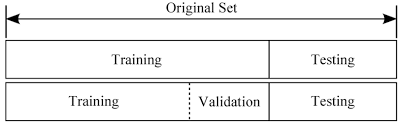

This is a key concept in Machine Learning, so it's important to understand why. I recommend reading more in-depth articles about the subject. Furthermore, chapter 6 of the book "Introduction to Machine Learning with Python" by Andreas C. Muller & Sarah Guido (pages 306 and 307, mainly) gives a really good perspective on this problem.

---

For further information about Pipelines and RandomSearchCV, check the docs out:

**Pipelines** - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

**RandomizedSearchCV** - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
import random

# Now, we are going to create our Pipeline, fitting several different data preprocessing and modeling
# techniques inside a RandomSearchCV, to check which group of techniques has better performance.

# Building a Pipeline inside RandomSearchCV, responsible for finding the best model and it's parameters
def defineBestModelPipeline(df, target, numeric_columns, categorical_columns):
    
    # Splitting original data into Train and Test BEFORE applying transformations
    # Later in RandomSearchCV, x_train will be splitted into train/val sets
    # The transformations are going to be fitted specifically on the train set,
    # and then applied to both train/test sets. This way, information leakage is avoided!
    x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.10, random_state=42)
    
    
    # 1st -> #### ----------- Numeric Transformers ----------- ####
    
    # Here, we are creating different several different data transformation pipelines 
    # to be applied in our numeric features
    numeric_transformer_1 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=42)),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_2 = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')), # or strategy='median'
                                            ('scaler', StandardScaler())])

    
    # 2nd -> #### ----------- Categorical Transformers ----------- ####
    
    # We are going to encode categorical features using LeaveOneOutEncoder and TargetEncoder.
    # Note: TargetEncoder uses the mean target values (probabilities for classification and 
    # continuous values for regression) of each category inside a column to encode them.
    
    # LeaveOneOutEncoder is an alternative to TargetEncoder. It implements an improvement on TargetEncoder's
    # "overfitting behaviour", by leaving 1 of the observations out of the mean calculation for a specific category.
    # Read about it here: https://towardsdatascience.com/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
    # Documentation: https://contrib.scikit-learn.org/category_encoders/leaveoneout.html
    
    categorical_transformer_1 = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                                ('leaveoneout', LeaveOneOutEncoder(sigma=0.1))])
    
    categorical_transformer_2 = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                                ('targetencoder', TargetEncoder(min_samples_leaf=3, smoothing=2))])
    
    
    # 3rd -> #### ----------- Combining both numerical and categorical data pipelines ----------- ####
    
    # Here, we are creating different ColumnTransformers, each one with a different numerical/categotical transformation
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer_1, categorical_columns)])
    
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer_2, categorical_columns)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer_1, categorical_columns)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer_2, categorical_columns)])
    
    
    # 4th -> #### ----------- Testing different data transformation steps and models inside RandomSearchCV ----------- ####
    
    # Finally, we are going to apply these different data transformations to RandomSearchCV,
    # trying to find the best imputing strategy, the best feature transformation strategy
    # and the best model with it's respective parameters.
    # Below, we just need to initialize a Pipeline object with any transformations we want, on each of the steps.
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1), # Initializing data transformation step by choosing any of the above
                           ('clf', SVC())]) # Initializing modeling step with any model object
                           #memory='cache_folder') -> Used to optimize memory when needed
    
    
    # Now, we define the hyperparameter grid that will be used by RandomSearchCV. It will randomly chose
    # options for each step inside the dictionaries ('data transformations', 'feature_selection', 'clf'
    # and clf's parameters). Then, for each chosen option, it will apply the transformations, train the
    # chosen model and evaluate it in the validation fold of the cross validator we define.
    # In the end of it's iterations, RandomSearchCV will return some metrics, such as the best pipeline,
    # model results for all iterations and more.
    
    params_grid = [   
                    {'data_transformations': [data_transformations_1, data_transformations_2,
                                              data_transformations_3, data_transformations_4],
                     'clf': [RandomForestClassifier()],
                     'clf__n_estimators': [int(x) for x in np.linspace(5, 30, num=15)],
                     'clf__max_features': [None, "sqrt", "log2"],
                     'clf__max_depth': [int(x) for x in np.linspace(3, 10, num=5)],
                     'clf__random_state': [int(x) for x in np.linspace(1, 49, num=30)]},
                    
                        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2,
                                              data_transformations_3, data_transformations_4],
                     'clf': [LGBMClassifier()],
                     'clf__n_estimators': [int(x) for x in np.linspace(3, 20, num=10)],
                     'clf__max_depth': [int(x) for x in np.linspace(2, 8, num=6)],
                     'clf__learning_rate': np.linspace(0.1, 0.7)},

        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2,
                                              data_transformations_3, data_transformations_4],
                     'clf': [XGBClassifier()],
                     'clf__n_estimators': [int(x) for x in np.linspace(3, 15, num=10)],
                     'clf__eta': np.linspace(0.1, 0.9),
                     'clf__max_depth': [int(x) for x in np.linspace(2, 7, num=5)],
                     'clf__gamma': np.linspace(0.1, 1),
                     'clf__lambda': np.linspace(0.1, 1)},
                ]
    
    
    # Now, we fit a RandomSearchCV to search over the grid of parameters defined above
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'average_precision', 'roc_auc']
    
    # Creating our cross validator object with StratifiedShuffleSplit (5 folds).
    # Stratification assures that we split the data such that the proportions
    # between classes are the same in each fold as they are in the whole dataset
    cross_validator = StratifiedShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=7)
    
    # Creating the randomized search cv object and fitting it
    best_model_pipeline = RandomizedSearchCV(estimator=pipe, param_distributions=params_grid, 
                                             n_iter=50, scoring=metrics, refit='accuracy', 
                                             n_jobs=-1, cv=cross_validator, random_state=21,
                                             error_score='raise', return_train_score=False)

    best_model_pipeline.fit(x_train, y_train)
    
    # At last, we check the final results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Classifier found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Estimator's average Accuracy Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline

In [ ]:
# Calling the function above, returing train/test data and best model's pipeline
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(df, target, numeric_columns, categorical_columns)

# Checking best model's performance on test data
test_set_results = testSetResultsClassifier(best_model_pipeline, x_test, y_test)

Here's a visual representation of the best pipeline found by RandomSearchCV:

In [ ]:
from sklearn import set_config
from sklearn.utils import estimator_html_repr

# Set config to 'diagram' so we can visualize pipelines/composite estimators
set_config(display='diagram')

# Visualization of the best estimator found by RandomSearchCV
best_model_pipeline.best_estimator_

## Precision-Recall and ROC Curves

Let's take a look at the Precision/Recall and ROC Curves of the best model in our separate test dataset.

In [ ]:
# Transforming the test data
x_test = best_model_pipeline.best_estimator_[0].transform(x_test)
    
# Calculating precision/recall threshold values for Probabilistic models
precision, recall, thresholds_prc = precision_recall_curve(y_test, best_model_pipeline.best_estimator_[1].predict_proba(x_test)[:, 1])
closest_to_025_prc = np.argmin(np.abs(thresholds_prc - 0.25))    # Getting information about the points in the graph that 
closest_to_default_prc = np.argmin(np.abs(thresholds_prc - 0.5)) # are closer to the default threshold for predict_proba (0.5),
closest_to_075_prc = np.argmin(np.abs(thresholds_prc - 0.75))    # threshold 0.25 and threshold 0.75.

# Plotting the curve
plt.plot(precision, recall, label="Results, Pecision Recall Curve")
plt.plot(precision[closest_to_025_prc], recall[closest_to_025_prc], 'v', c='k', # Plotting the marker for threshold 0.25
         markersize=10, label="Threshold 0.25", fillstyle="none", mew=2)       
plt.plot(precision[closest_to_default_prc], recall[closest_to_default_prc], 's', c='k', # Plotting the marker for threshold 0.5 (default)
         markersize=10, label="Default threshold (0.5)", fillstyle="none", mew=2)        
plt.plot(precision[closest_to_075_prc], recall[closest_to_075_prc], '^', c='k', # Plotting the marker for threshold 0.75 
         markersize=10, label="Threshold 0.75", fillstyle="none", mew=2)
plt.title("Precision-Recall Curve for the best model found")
plt.xlabel("Precision: TP / (TP + FP)")
plt.ylabel("Recall: TP / (TP + FN)")
plt.legend(loc="best")

In [ ]:
# Calculating ROC threshold values for Probabilistic models
fpr, tpr, thresholds_roc = roc_curve(y_test, best_model_pipeline.best_estimator_[1].predict_proba(x_test)[:, 1])
closest_to_025_roc = np.argmin(np.abs(thresholds_roc - 0.25))    # Getting information about the points in the graph that 
closest_to_default_roc = np.argmin(np.abs(thresholds_roc - 0.5)) # are closer to the default threshold for predict_proba (0.5),
closest_to_075_roc = np.argmin(np.abs(thresholds_roc - 0.75))    # threshold 0.25 and threshold 0.75.

# Plotting the curve
plt.plot(fpr, tpr, label="Results, ROC Curve")
plt.plot(fpr[closest_to_025_roc], tpr[closest_to_025_roc], 'v', c='k', # Plotting the marker for threshold 0.25
         markersize=10, label="Threshold 0.25", fillstyle="none", mew=2)       
plt.plot(fpr[closest_to_default_roc], tpr[closest_to_default_roc], 's', c='k', # Plotting the marker for threshold 0.5 (default)
         markersize=10, label="Default threshold (0.5)", fillstyle="none", mew=2)        
plt.plot(fpr[closest_to_075_roc], tpr[closest_to_075_roc], '^', c='k', # Plotting the marker for threshold 0.75 
         markersize=10, label="Threshold 0.75", fillstyle="none", mew=2)
plt.title("ROC Curve for the best model found")
plt.xlabel("FPR: FP / (FP + TN)")
plt.ylabel("TPR (Recall): TP / (TP + FN)")
plt.legend(loc="best")

After going through all steps in RandomSearchCV, we can check the results from it's steps using the "cv_results_" atrribute.

In [ ]:
# Visualizing all results and metrics, from all models, obtained by the RandomSearchCV steps
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

In [ ]:
# Visualizing all results and metrics obtained only by the best classifier, considering Accuracy score
display(df_results[df_results['rank_test_accuracy'] == 1])

In [ ]:
# Visualizing all results and metrics obtained only by the best classifier, considering ROC_AUC score
display(df_results[df_results['rank_test_roc_auc'] == 1])

## Plotting Feature Importances

If we want to, it's also possible to check the feature importances of the best model, in case they're easy to understand and explain.

Just remember that, if the best pipeline found in RandomSearchCV applies feature extraction or creates new features using PolynomialFeatures, it will be harder to explain importances.

In a scenario that no transformations are applied to the features inside the pipeline, if the model is tree-based (RandomForestClassifier, for example), or linear regression-based (Logistic Regression, for example), then explaining most important features becomes much easier.

In [ ]:
# Here, we access the categorical feature names generated by the Categorical Encoder, and then concatenate them
# with the numerical feature names, in the same order our pipeline is applying data transformations.
# Since we're applying transformations on numeric columns first, and then on categorical ones, our
# feature names list will be:
feature_names_in_order = numeric_columns + categorical_columns

print(feature_names_in_order)

### Feature Importances for Tree-Based Models, top 10 values:

In [ ]:
##### Plotting Feature Importances for Random Forests & XGBoost #####
feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['clf'].feature_importances_, index=feature_names_in_order)
feat_importances.nlargest(10).plot(kind='barh')

##### Plotting feature importances for LGBM Model #####
# Note: although this is a tree-based model, it's object doesn't store a "feature_importances" attribute such as Random 
# Forests and XGB. Still, the library's got it's own feature importance plotting API, as showed below.
# plot_importance_lgbm(best_model_pipeline.best_estimator_.named_steps['clf'], 
#                      figsize=(10, 4), title='Feature importances for LGBM Classifier',
#                      importance_type='gain', max_num_features=10)

## Predictions

Now that we have tried different preprocessing and modeling techniques, resulting in a final best pipeline, let's use it to predict the test data provided by kaggle.

**Remember:** All transformations that were done in the training dataset must be done in the test set.

In [ ]:
# Importing data and displaying some rows
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# Creating a categorical variable for Ages
df_test['AgeCat'] = ''
df_test['AgeCat'].loc[(df_test['Age'] < 18)] = 'young'
df_test['AgeCat'].loc[(df_test['Age'] >= 18) & (df_test['Age'] < 56)] = 'mature'
df_test['AgeCat'].loc[(df_test['Age'] >= 56)] = 'senior'

# Creating a categorical variable for Family Sizes
df_test['FamilySize'] = ''
df_test['FamilySize'].loc[(df_test['SibSp'] <= 2)] = 'small'
df_test['FamilySize'].loc[(df_test['SibSp'] > 2) & (df_test['SibSp'] <= 5 )] = 'medium'
df_test['FamilySize'].loc[(df_test['SibSp'] > 5)] = 'large'

# Creating a categorical variable to tell if the passenger is alone
df_test['IsAlone'] = ''
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) > 0)] = 'no'
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) == 0)] = 'yes'

# Creating a categorical variable to tell if the passenger is a Young/Mature/Senior male or a Young/Mature/Senior female
df_test['SexCat'] = ''
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] <= 21)] = 'youngmale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & ((df_test['Age'] > 21) & (df_test['Age']) < 50)] = 'maturemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 50)] = 'seniormale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] <= 21)] = 'youngfemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & ((df_test['Age'] > 21) & (df_test['Age']) < 50)] = 'maturefemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 50)] = 'seniorfemale'

# Creating a categorical variable for the passenger's title
# Title is created by extracting the prefix before "Name" feature
# This title needs to be a feature because all female titles are grouped with each other
# Also, creating a column to tell if the passenger is married or not
# "Is_Married" is a binary feature based on the Mrs title. Mrs title has the highest survival rate among other female titles
df_test['Title'] = df_test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_test['Is_Married'] = 0
df_test['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
df_test['Title'] = df_test['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_test['Title'] = df_test['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

# Creating "Ticket Frequency" Feature
# There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier
df_test['Ticket_Frequency'] = df_test.groupby('Ticket')['Ticket'].transform('count')

# Dropping unnecessary columns
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
# Applying best_model_pipeline
# Step 1 -> Transforming data the same way we did in the training set;
# Step 2 -> making predictions using the best model obtained by RandomSearchCV.
test_predictions = best_model_pipeline.best_estimator_.predict(df_test)

print(test_predictions)

In [ ]:
# Generating predictions file that is going to be submitted to the competition
df_submission = pd.read_csv("/kaggle/input/titanic/test.csv")

df_submission['Survived'] = test_predictions # Adding a column with predicted values

df_submission.drop(df_submission.columns.difference(['PassengerId', 'Survived']), axis=1, inplace=True) # Selecting only needed columns

df_submission.head(10)

In [ ]:
# Checking if the number of rows is OK (the file is expected to have 418 rows)
df_submission.count()

In [ ]:
# Writing submitions to CSV file
df_submission.to_csv('submission.csv', index=False)

---

# *Extra Section - Unsupervised Learning: Dimensionality Reduction and Clustering*

Another important field of Machine Learning is Unsupervised Learning. Because it may not be so intuitive for beginners to clearly understand where and when to apply Unsupervised Learning techniques, the goal of this section is to try to clarify it, showing some practical applications of these techniques using the Titanic dataset.

## Part 1: Dimensionality Reduction

When working on a dataset with too many columns (a high-dimensional dataset), one might think if there is a way to visualize data points on a 2-D space without having to create (X, Y) plots for each possible pair of columns. Dimensionality Reduction techniques aim to solve this problem by reducing the original high number of dimensions to a reduced dimensional representation of your choice.

## 1.1 - PCA (Principal Component Analysis)

PCA is a very common technique for dimensionality reduction. It's generally used to find a new representation of your original dataset, that cointains only a percentage of it's original variance (information is lost in the process of representing higher dimensions into lower dimensions).

In a brief description, PCA tries to identify the directions from which the original dataset varies the most (horizontally, vertically, diagonally, etc.), and sets these directions as elements called Principal Components. It means that, PC1 (Principal Component 1) is the direction to where data varies that can better explain it's total variance, PC2 (principal component 2) is the second best direction for explaining it's total variance, and so on. These principal components are the new features in our reduced dimensional space.

Another way to see Principal Components is that they are linear combinations from the original features in the dataset, ordered by how much of the total variance is explained by them (PC1 is the linear combination that better "keeps", "explains" the total variance in the dataset; PC2 is the second best linear combination, and so on).

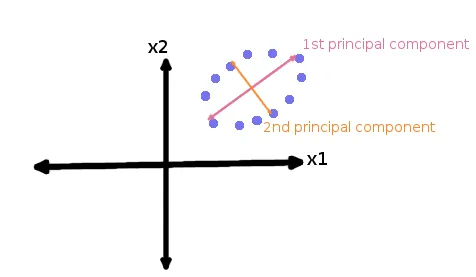

If you want to have a better view of how PCA works, please take a look at this youtube video by Josh Stormer, on his "StatQuest" channel: https://www.youtube.com/watch?v=FgakZw6K1QQ

In [ ]:
# Since PCA uses the covariance matrix to derive eigenvectors
# and eigenvalues (or in some cases, Singular Value Decomposition),
# our dataset must be numeric so the algorithm can work properly
numeric_df = df[numeric_columns]

# Defining a PCA Pipeline that will return transformed numeric columns
def definePCAPipeline(numeric_columns):

    # 1st -> Numeric Transformer
    numeric_transformer = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                                            ('scaler', StandardScaler())])
    
    # 2nd -> Putting the scaling transformation step into a ColumnTransformer object
    data_transformations = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_columns)])
    
    # 3rd -> Final PCA Pipeline
    pca_pipeline = Pipeline(steps=[('data_transformations', data_transformations),
                                   ('feature_transf', PCA(n_components=2, whiten=True))])
    
    return pca_pipeline

In [ ]:
# Generating transformed data after PCA, only 2 principal components chosen
pca_pipeline = definePCAPipeline(numeric_columns)
pca_arr = pca_pipeline.fit_transform(numeric_df) # Only numeric data passed to PCA

# How much variance does our PCA obtained components explains from the original variance in data?
# Note that we need to pass only numeric data to our PCA pipeline, so the total variance does not include categorical data
comp1 = pca_pipeline[1].explained_variance_ratio_[0] # First principal component
comp2 = pca_pipeline[1].explained_variance_ratio_[1] # Second principal component
exp_variance_pca = comp1 + comp2

print("Compontent 1 explained variance ratio:", comp1)
print("Compontent 2 explained variance ratio:", comp2)
print("Total explained variance ratio obtained from both components:", exp_variance_pca)

# Plotting how much each feature contributes to the Principal Components
plt.matshow(pca_pipeline[1].components_, cmap='viridis')
plt.yticks([0, 1], ['Principal Component 1', 'Principal Component 2'])
plt.colorbar()
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=60, ha='left')
plt.xlabel('Feature Name')
plt.ylabel('Principal Components')

In [ ]:
# Visualizing the new 2-dimensional dataset and points' respective classes
pca_df = pd.DataFrame(pca_arr, columns=["PC1", "PC2"])
pca_df['Survived'] = target

pca_df.head(10)

In [ ]:
# Creating different datasets for survivors and non-survivors
pca_df_survivors = pca_df[pca_df['Survived'] == 1]
pca_df_nonsurvivors = pca_df[pca_df['Survived'] == 0]

# Visualizing the two-dimensional dataset
scatter_obj_survs = go.Scatter(x=pca_df_survivors['PC1'],
                               y=pca_df_survivors['PC2'],
                               mode="markers",
                               name='Survivors',
                               marker=dict(color='forestgreen'))


scatter_obj_nonsurvs = go.Scatter(x=pca_df_nonsurvivors['PC1'],
                                  y=pca_df_nonsurvivors['PC2'],
                                  mode="markers",
                                  name='Non-survivors',
                                  marker=dict(color='darkred'))


data = [scatter_obj_survs, scatter_obj_nonsurvs]

# Plot's Layout (background color, title, etc.)
layout = go.Layout(title='2-Dimensional visualization of survivors and non-survivors',
                   xaxis=dict(title='PC1'), yaxis=dict(title='PC2'))

fig = go.Figure(data=data, layout=layout)
fig.show()

## 1.2 - t-SNE (t-Distributed Stochastic Neighbour Embedding)

Another great algorithm generally used for visualizing X-dimensional representations of data is **t-SNE**. 

In a brief description, t-SNE initially calculates distances between data points in the original feature space (by creating something called **"Similarity Matrix"** (or Distance Matrix): a matrix representing each data point and it's distance to the other data points in the feature space). Then, it represents all original points by randomly positioning them in a new dimensional-space (for exmaple: in a 2-D space), following a t-distribution. After that, it creates another Similarity Matrix, now for this new random representation.

Lastly, it moves the points that were randomly positioned on the new dimensional space, trying to make the second similarity matrix as close as possible to the first one. That is, it tries to represent points that are closer in the original feature space closer, and points that are far apart, farther apart.


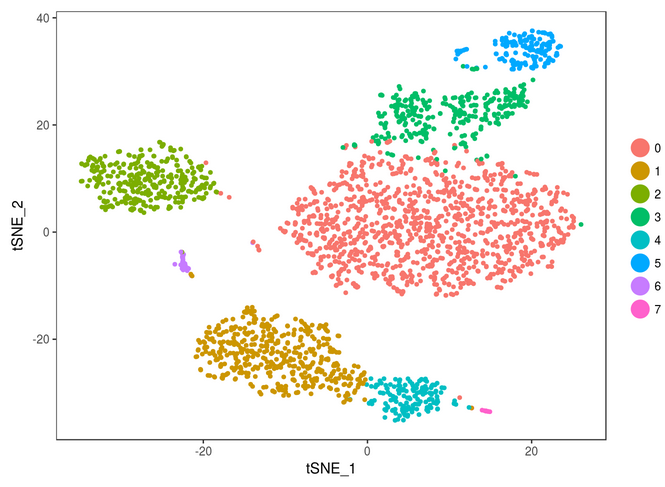


If you want to know more about t-SNE, please take a look at this article: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

Also, there is a really didatic explanation in "StatQuest" youtube channel, so I invite you to watch it too: https://www.youtube.com/watch?v=NEaUSP4YerM

In [ ]:
# Generating transformed data using PCA pipeline's transformations (pca_pipeline[0])
transformed_df = pca_pipeline[0].transform(numeric_df)

# Reducing dimensionality with TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_arr = tsne.fit_transform(transformed_df)

In [ ]:
# Visualizing the new 2-dimensional dataset and points' respective classes
tsne_df = pd.DataFrame(tsne_arr, columns=["tsne_dim1", "tsne_dim2"])
tsne_df['Survived'] = target

tsne_df.head(10)

In [ ]:
# Creating different datasets for survivors and non-survivors
tsne_df_survivors = tsne_df[tsne_df['Survived'] == 1]
tsne_df_nonsurvivors = tsne_df[tsne_df['Survived'] == 0]


# Visualizing the two-dimensional dataset
scatter_obj_survs_tsne = go.Scatter(x=tsne_df_survivors['tsne_dim1'],
                                    y=tsne_df_survivors['tsne_dim2'],
                                    mode="markers",
                                    name='Survivors',
                                    marker=dict(color='forestgreen'))


scatter_obj_nonsurvs_tsne = go.Scatter(x=tsne_df_nonsurvivors['tsne_dim1'],
                                       y=tsne_df_nonsurvivors['tsne_dim2'],
                                       mode="markers",
                                       name='Non-survivors',
                                       marker=dict(color='darkred'))


data_tsne = [scatter_obj_survs_tsne, scatter_obj_nonsurvs_tsne]


# Plot's Layout (background color, title, etc.)
layout_tsne = go.Layout(title='2-Dimensional visualization of survivors and non-survivors (t-SNE algorithm)',
                        xaxis=dict(title='tsne_dim1'), yaxis=dict(title='tsne_dim2'))

fig_tsne = go.Figure(data=data_tsne, layout=layout_tsne)
fig_tsne.show()

From both PCA and t-SNE 2-dimensional representations, we can see that there isn't a clear linear separation between survivors and non-survivors. This can be interpreted as a sign that linear separation lines (linear models) probably wouldn't work that well on a job to separate both classes. Because of that, non-linear models such as Kernelized SVMs and Decision-tree based methods should have better results, when modeling for this specific problem.

---

## Part 2: Clustering

The main objective of clustering techniques is to assing each data point in the dataset to a cluster (the concept is similar to classification). The difference is that in classification, your data is formed by features (X) and a specific target (Y) that is used to model a decision function. In clustering, no specific target (Y) is used to train the algorithms. The goal is to receive the feature vector (X) as an input, and assign similar data points to the same "group" (cluster).

Clustering techniques are widely used to help data scientists generate insights from data. Here, I present 3 common and useful algorithms used for this task: K-Means, Agglomerative Hierarchical Clustering and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Each one has got it's own advantages and disadvantages. I'll try to describe how each algorithm clusterizes data points, and the main benefits of using each one.

## 2.1 - Partitional Clustering: K-Means 

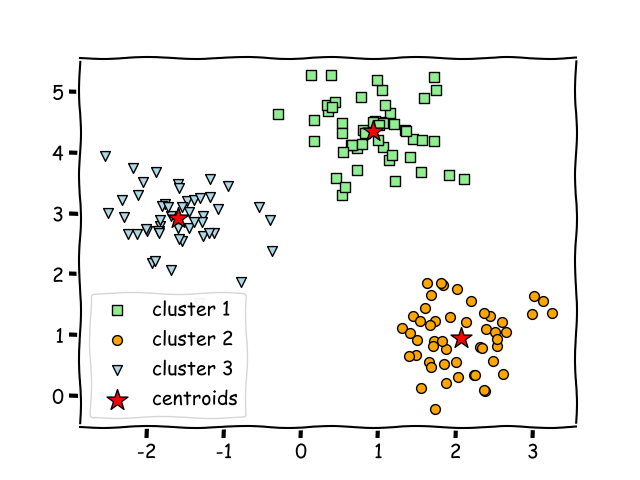

K-Means does it's clustering by calculating the distances of each data point in the feature space from something we call **centroids**. Centroids are (X, Y) coordinates that are defined as the center of each one of the clusters.

Initially, K-Means initializes all centroids randomly. The number of centroids is defined by the user on the attribute n_clusters. Then, for each data point in the feature space, it calculates distances from these centroids. Each data point is assigned to the cluster defined by the closest centroid. After that, K-means updates the centroids' positions to be the mean (center) of each cluster. It then calculates the distances for each data point again, and assign them to new clusters. This process is repeated until there are no major updates in centroids' positions.

You can see an example of K-Means training process in the image below. Square (a) shows data represented in the 2-dimensional feature space. Square (b) represents the random initialization of centroids (defined by KMeans' parameter setting of n_clusters = 2). Then, in square (c), each data point is assigned to a cluster based on it's distance to centroids. In square (d), centroids are updated to be the mean (center) of both clusters. Afterwards, each data point is again assigned to a cluster (based on it's distance to the updated centroids), and this process is repeated until no major changes are applied to centroid's positions.

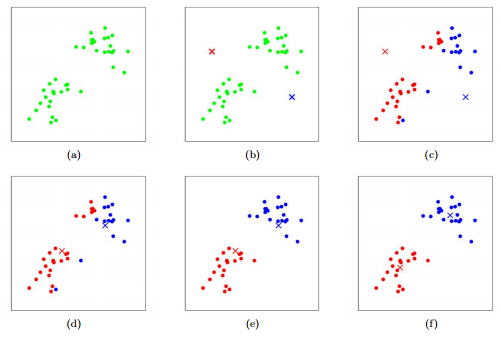

K-Means is a great baseline algorithm. It's easily interpretable and scales well on large datasets. One negative point on it's usage is that you need to define the specific number of clusters you want the algorithm to find. In real world scenarios, where data shapes are much more complex, it is really hard to tell what is the optimal number of clusters (still, there are a few techniques to help dealing with that problem, such as the "Elbow Method"). Aditionally, because of it's behaviour of updating centroids to be the center of each cluster, K-Means can only capture relatively simple cluster shapes (spherical/convex ones).

There is also a video about it on "StatQuest" youtube channel, so I recommend you to take a look at it: https://www.youtube.com/watch?v=4b5d3muPQmA

In [ ]:
# K-Means and silhouette_score libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining a function to find the optimal number of K-Means' n_clusters parameter
# Note that we are using a dataset that contains only numeric features. This is
# because K-Means calculates the mean of each cluster to update centroids.
# There is a K-Means implementation that works for mixed data types called
# K-Prototypes. If you want to take a look at it, please visit this article:
# https://antonsruberts.github.io/kproto-audience/
def findOptimalNClustersKMeans(transformed_df):
    
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    silhouette_scores = []

    # Testing n_clusters options
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=7)
        cluster_labels = kmeans.fit_predict(transformed_df)
        
        # Evaluating clusters created by KMeans
        silhouette_avg = silhouette_score(transformed_df, cluster_labels)
        print("K-Means: for n_clusters =", n_clusters, ", the average silhouette_score is", silhouette_avg)
        
        # Appending iteration's avg silhouette score to scores list
        silhouette_scores.append(silhouette_avg)
        
    return range_n_clusters, silhouette_scores

range_n_clusters, silhouette_scores = findOptimalNClustersKMeans(transformed_df)

In [ ]:
# Visualizing the "Elbow" graph
elbow_kmeans = go.Scatter(x=range_n_clusters,
                          y=silhouette_scores,
                          mode='lines',
                          name='kmeans elbow line',
                          marker_color='orange')

# Plot's Layout (background color, title, etc.)
layout_elbow_kmeans = go.Layout(title='Number of Clusters x Average Silhouette Score, K-Means Algorithm',
                          xaxis=dict(title='n_clusters'), yaxis=dict(title='Average Silhouette Score'))

elbow_kmeans = go.Figure(data=elbow_kmeans, layout=layout_elbow_kmeans)
elbow_kmeans.show()

### Visualizing K-Means results using the PCA reduced Dataset

To check out how clusters were created, we can use the PCA 2-dimensional dataset to visualize points and it's respective segmentations.

In [ ]:
# Since the best value for the average silhouette_score was found with 2 clusters,
# let's create a K-Means Object with n_clusters = 2.
kmeans = KMeans(n_clusters=2, random_state=7)

# Fitting and clusterizing with KMeans
kmeans_defined_clusters = kmeans.fit_predict(transformed_df)

# Concatenating K-Means clusters into the 2-D PCA transformed df
pca_df['KMeans_Defined_Clusters'] = ''
pca_df['KMeans_Defined_Clusters'] = kmeans_defined_clusters
pca_df['KMeans_Defined_Clusters'] = pca_df['KMeans_Defined_Clusters'].astype(str)

pca_df.head(10)

In [ ]:
# KMeans object also stores centroids' positions for each cluster
pca_cluster_centers = pca_pipeline[1].transform(kmeans.cluster_centers_)

# Creating a dataframe to store cluster centers (centroids)
# The goal is to visualize them (in 2-D) inside each cluster
centroids_df = pd.DataFrame(pca_cluster_centers, columns=["X_coord", "Y_coord"])

# Creating columns to store which centroid belongs to each cluster
centroids_df['cluster_centroid'] = ""
centroids_df['cluster_centroid'][0] = 'centroid, cluster 0'
centroids_df['cluster_centroid'][1] = 'centroid, cluster 1'

centroids_df.head(10)

In [ ]:
# Colors
colors = ['orange', 'steelblue', 'violet']

cyclecolors = cycle(colors)
color = next(cyclecolors)

kmeans_clusters = pca_df.KMeans_Defined_Clusters.unique()
kmeans_centroids = centroids_df.cluster_centroid.unique()


# Visualizing the two-dimensional dataset
data_kmeans = []

for cluster in kmeans_clusters:
    scatter_obj_cluster_kmeans = go.Scatter(x=pca_df[(pca_df['KMeans_Defined_Clusters'] == cluster)]['PC1'],
                                            y=pca_df[(pca_df['KMeans_Defined_Clusters'] == cluster)]['PC2'],
                                            mode='markers',
                                            name=cluster,
                                            marker_color=color)
    data_kmeans.append(scatter_obj_cluster_kmeans)
    color = next(cyclecolors)
    

# Plotting the centroids of each cluster
for centroid in kmeans_centroids:
    scatter_obj_centroid_kmeans = go.Scatter(x=centroids_df[(centroids_df['cluster_centroid'] == centroid)]['X_coord'],
                                             y=centroids_df[(centroids_df['cluster_centroid'] == centroid)]['Y_coord'],
                                             mode='markers',
                                             name=centroid,
                                             marker_size=12,
                                             marker_symbol='x-dot',
                                             marker_color='black')
    data_kmeans.append(scatter_obj_centroid_kmeans)


# Plot's Layout (background color, title, etc.)
layout_kmeans = go.Layout(title='PCA 2-Dimensional visualization of clusters created by K-Means Algorithm',
                          xaxis=dict(title='PC1'), yaxis=dict(title='PC2'))

fig_kmeans = go.Figure(data=data_kmeans, layout=layout_kmeans)
fig_kmeans.show()

## 2.2 - Hierarchical Clustering: Agglomerative algorithms

The term "Agglomerative" in the name of this algorithm can give us some pretty good intuiton about how it works. This technique is based on "merging" individual data points that are close to each other to form bigger groups, until the given number of clusters (parameter n_clusters) is reached.

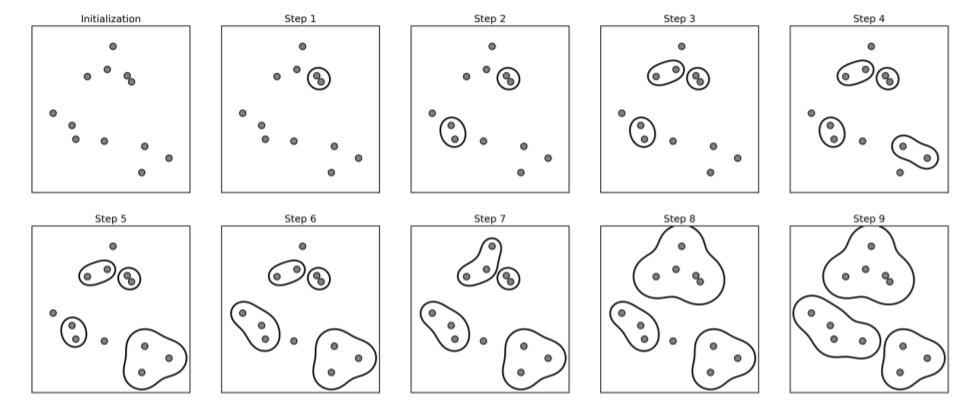

The image above was taken from page 185 of the book "Introduction to Machine Learning with Python" by Andreas C. Muller & Sarah Guido. Let's use it to exemplify how this algorithm clusterizes data points. Initially, we have 12 data points representing our original dataset. Agglomerative Clustering starts by declaring each point it's own cluster. Then, in each step, the algorithm identifies two clusters that are closest to each other ("most similar" ones) and merges them, creating smaller clusters. This merging process is repeated until the number of clusters defined by the user is reached (in this case, n_clusters = 3).

The definition of what "most similar" clusters means is set by the algorithm's parameter "linkage". The most commonly used ones are (they're also known as **Measures of Dissimilarity**):

-> **Single linkage:** merges the two clusters with the minimum distance between all of their points (uses the minimum of the distances between all observations of the two sets).

-> **Average linkage:** merges the two clusters that have the smallest average distance between all of their points (uses the average of the distances of each observation of the two sets).

-> **Complete (a.k.a Maximum linkage) linkage:** merges the two clusters that have the smallest maximum distance between all of their points (uses the maximum distances between all observations of the two sets).

-> **Ward (a.k.a Minimum Variance) linkage:** picks the two clusters to merge such as the variance within all clusters increases the least (minimizes the variance of the clusters being merged). Generally works well on most datasets (the standard parameter of AgglomerativeClustering's implementation on scikit-learn).

One benefit of using this algorithm is that you can visualize mergings in a diagram we call **Dendrogram**.

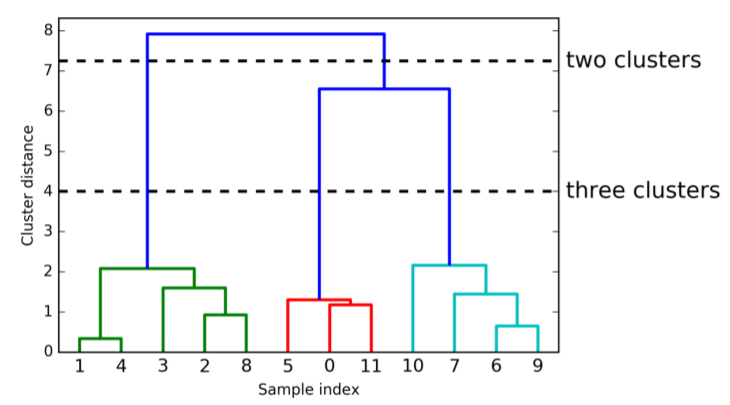

Dendrograms allow you to visualize the hierachical nature of the cluster's construction/merging process. On the bottom, the dendrogram shows all data points (in this example, numbered from 0 to 11) and it's respective merging branches, while the Y axis represents the distances between clusters. The length of each branch shows how far apart merged clusters are from each other.

Note how distant the cluster formed by points (1, 4, 3, 2, 8) is from the cluster formed by points (5, 0, 11, 10, 7, 6, 9). In practice, it means that if we choose n_clusters=2, the task of going from 3 to 2 clusters will merge some very far-apart points, which may not be a good choice.

Unfortunately, this algorithm is still not that good at separating too complex shaped datasets, and it also does not scale well to very large ones. Still, the option of visualizing dendrograms might make this method suitable for some cases.

Let's take a look at a Dendrogram example.

In [ ]:
# Agglomerative Clustering, dendrogram plotting and silhouette score libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import silhouette_score

# Generating Linkage array (using ward linkage) and dendrogram object
# Again, using the numeric dataset.
linkage_array = ward(transformed_df)
dendrogram(linkage_array)

# Plotting dendrogram
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [47.5, 47.5], '--', c='k')
ax.plot(bounds, [40, 40], '--', c='k')
ax.plot(bounds, [34, 34], '--', c='k')
ax.plot(bounds, [29, 29], '--', c='k')
ax.text(bounds[1], 47.5, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 40, ' three clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 34, ' four clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 29, ' five clusters', va='center', fontdict={'size': 15})

plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")

In [ ]:
# Defining a function to find the optimal number of A.C.'s n_clusters parameter:
def findOptimalNClustersAC(transformed_df):
    
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    silhouette_scores = []

    # Testing n_clusters options
    for n_clusters in range_n_clusters:
        ac = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = ac.fit_predict(transformed_df)
        
        # Evaluating clusters created by Agglomerative Clustering
        silhouette_avg = silhouette_score(transformed_df, cluster_labels)
        print("Agglomerative Clustering: for n_clusters =", n_clusters, ", the average silhouette_score is", silhouette_avg)
        
        # Appending iteration's avg silhouette score to scores list
        silhouette_scores.append(silhouette_avg)
        
    return range_n_clusters, silhouette_scores

range_n_clusters_ac, silhouette_scores_ac = findOptimalNClustersAC(transformed_df)

In [ ]:
# Visualizing the "Elbow" graph
elbow_ac = go.Scatter(x=range_n_clusters_ac,
                      y=silhouette_scores_ac,
                      mode='lines',
                      name='agglomerative clustering elbow line',
                      marker_color='dodgerblue')

# Plot's Layout (background color, title, etc.)
layout_elbow_ac = go.Layout(title='Number of Clusters x Average Silhouette Score, Agglomerative Clustering Algorithm',
                            xaxis=dict(title='n_clusters'), yaxis=dict(title='Average Silhouette Score'))

elbow_ac = go.Figure(data=elbow_ac, layout=layout_elbow_ac)
elbow_ac.show()

In [ ]:
# Since the best value for silhouette_score was found with 2 clusters,
# let's create an A.C. Object with n_clusters = 2.
ac = AgglomerativeClustering(n_clusters=2)
ac_defined_clusters = ac.fit_predict(transformed_df)

# Concatenating A.C. clusters into the 2-D PCA transformed df
pca_df['AgglomerativeClustering_Defined_Clusters'] = ''
pca_df['AgglomerativeClustering_Defined_Clusters'] = ac_defined_clusters
pca_df['AgglomerativeClustering_Defined_Clusters'] = pca_df['AgglomerativeClustering_Defined_Clusters'].astype(str)

pca_df.head(10)

### Visualizing Agglomerative Clustering results using the PCA reduced Dataset

To check out the clusters that were created by the Agglomerative Clustering algorithm, we can use the PCA 2-dimensional dataset to visualize points and it's respective segmentations.

In [ ]:
# Colors
colors = ['orange', 'steelblue', 'violet', 'tomato', 'lime']

cyclecolors = cycle(colors)
color = next(cyclecolors)

ac_clusters = pca_df.AgglomerativeClustering_Defined_Clusters.unique()


# Visualizing the two-dimensional dataset
data_ac = []

for cluster in ac_clusters:
    scatter_obj_cluster_ac = go.Scatter(x=pca_df[(pca_df['AgglomerativeClustering_Defined_Clusters'] == cluster)]['PC1'],
                                            y=pca_df[(pca_df['AgglomerativeClustering_Defined_Clusters'] == cluster)]['PC2'],
                                            mode='markers',
                                            name=cluster,
                                            marker_color=color)
    data_ac.append(scatter_obj_cluster_ac)
    color = next(cyclecolors)


# Plot's Layout (background color, title, etc.)
layout_ac = go.Layout(title='PCA 2-Dimensional visualization of clusters created by Agglomerative Clustering algorithm',
                          xaxis=dict(title='PC1'), yaxis=dict(title='PC2'))

fig_ac = go.Figure(data=data_ac, layout=layout_ac)
fig_ac.show()

## 2.3 - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

This is another useful algorithm for clustering tasks. As it's name says, it bases itself on the density of the points distributed in the feature space to create clusters. Basically, DBSCAN categorizes data points into 3 types: **Noise** points, **Border** points and **Core** points. It's main parameters are **"n_samples"** and **"eps"**.

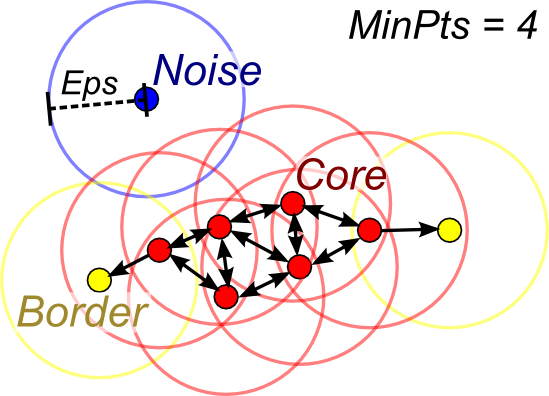

Let's think about an example where we defined "eps" value as 1.5, and "n_samples" as 4. Imagine that you could draw circles (like the ones showed in the image above) around each data point represented in the feature space. The **radius** of these circles is defined by the parameter **"eps"** (1.5, in this example). 

Now, to simulate how the algorithm works: first, take an arbitrary point and look at it. If there are at least **"n_samples" (in this example, 4) points** inside it's "1.5 eps" radius drawn circle, this point is considered as **"Core"**, and DBSCAN assigns it to cluster 0. 

Then, for each point inside this Core point's drawn circle, do the same task: if there are at least "n_samples" points inside their own circles, they're also categorized as "Core" points, and also assigned to cluster 0.

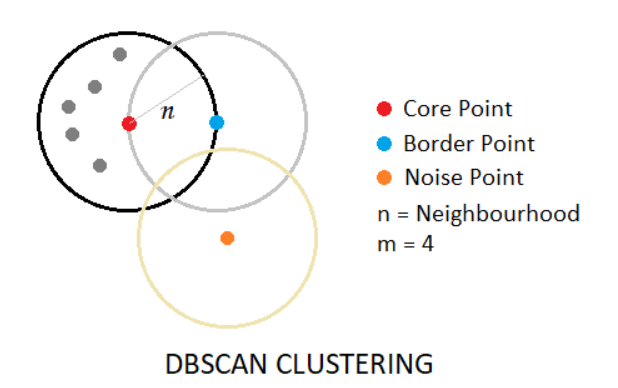

In a case where a data point has **less than "n_samples"** points inside it's circle (2, for example), the algorithm checks if at least one of these points are considered "Core" ones. If so, this data point is classified as **"Border"**. 

If the condition above is false (meaning there are less than "n_samples" points inside this point's circle, **and none of them are core ones**), it is classified as **"Noise"** (it can be interpreted as an outlier, that doesn't belong to any cluster). This process continues untill all points are analyzed and clusterized. 

The main benefits of using DBSCAN, when compared to the other algorithms we have seen so far, are: you don't need to previously set the number of clusters to be created; it will be automatically found, depending (mainly) on the values set for "eps" and "n_samples". Also, it can correctly detect more complex cluster shapes and points that doesn't belong to any clusters (outliers).

Benefits aside, the algorithm also has it's own disadvantadges. It fails to clusterize points when the variance inside each cluster is too different. Aditionally, just like Agglomerative Clustering, it doesn't allow predictions on new data.

In [ ]:
# DBSCAN's sklearn library
from sklearn.cluster import DBSCAN

# Creating DBSCAN object and defining clusters for each data point
# NOTE: Noise points (outliers) are assigned to "cluster -1"
dbscan = DBSCAN(min_samples=20, eps=2.4)
dbscan_defined_clusters = dbscan.fit_predict(transformed_df) # Also using the exclusively numeric dataset

# Evaluating clusters created by DBSCAN
silhouette_dbscan = silhouette_score(transformed_df, dbscan_defined_clusters)
print("DBSCAN: for eps = 2.4 and min_samples = 20, the average silhouette_score is", silhouette_dbscan)

### Visualizing DBSCAN's results using the PCA reduced Dataset

To check out the clusters that were created by DBSCAN, we can use the PCA 2-dimensional dataset to visualize points and it's respective segmentations.

In [ ]:
# Concatenating DBSCAN clusters into the 2-D PCA transformed df
pca_df['DBSCAN_Defined_Clusters'] = ''
pca_df['DBSCAN_Defined_Clusters'] = dbscan_defined_clusters
pca_df['DBSCAN_Defined_Clusters'] = pca_df['DBSCAN_Defined_Clusters'].astype(str)

pca_df.head(10)

In [ ]:
# Colors
colors = ['orange', 'steelblue', 'violet', 'tomato']

cyclecolors = cycle(colors)
color = next(cyclecolors)

dbscan_clusters = pca_df.DBSCAN_Defined_Clusters.unique()


# Visualizing the two-dimensional dataset
data_dbscan = []

for cluster in dbscan_clusters:
    scatter_obj_cluster_dbscan = go.Scatter(x=pca_df[(pca_df['DBSCAN_Defined_Clusters'] == cluster)]['PC1'],
                                            y=pca_df[(pca_df['DBSCAN_Defined_Clusters'] == cluster)]['PC2'],
                                            mode='markers',
                                            name=cluster,
                                            marker_color=color)
    data_dbscan.append(scatter_obj_cluster_dbscan)
    color = next(cyclecolors)


# Plot's Layout (background color, title, etc.)
layout_dbscan = go.Layout(title='PCA 2-Dimensional visualization of clusters created by DBSCAN',
                          xaxis=dict(title='PC1'), yaxis=dict(title='PC2'))

fig_dbscan = go.Figure(data=data_dbscan, layout=layout_dbscan)
fig_dbscan.show()